# Project Visualisations

## Import Libraries

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Setup CSV

In [70]:
df_FS = pd.read_csv('feasibility_strategys.csv')
df_LT = pd.read_csv('length_time.csv')
df_PT = pd.read_csv('paths_time.csv')
df_CR = pd.read_csv('corr.csv')
df_SELECTED = df_CR.iloc[:, 1:4]
df_PT.head()

,lengths,Running Time,Generated Paths,Pruned Paths,examples/benchmark/divByN.gcl runtime,examples/benchmark/divByN.gcl generated paths,examples/benchmark/divByN.gcl pruned paths,examples/benchmark/memberOf.gcl no heuristics runtime,examples/benchmark/memberOf.gcl no heuristics generated paths,examples/benchmark/memberOf.gcl no heuristics pruned paths,examples/benchmark/memberOf.gcl runtime,examples/benchmark/memberOf.gcl generated paths,examples/benchmark/memberOf.gcl pruned paths,examples/benchmark/pullUp.gcl no heuristics runtime,examples/benchmark/pullUp.gcl no heuristics generated paths,examples/benchmark/pullUp.gcl no heuristics pruned paths,examples/benchmark/pullUp.gcl runtime,examples/benchmark/pullUp.gcl generated paths,examples/benchmark/pullUp.gcl pruned paths
0,30,4.884139e-02,97,0,0.059223,5,8,6.585491e-02,127,0,1.203702e-01,114,13,1.061415e+00,126,0,0.132442,15,27
1,60,2.900310e+01,56675,0,0.065932,35,53,2.094551e+01,16383,0,2.387476e+01,16370,13,6.000000e+07,0,0,0.071176,8,14
2,90,6.000000e+07,0,0,0.243678,176,123,6.000000e+07,0,0,6.000000e+07,0,0,6.000000e+07,0,0,0.041721,8,16


## Final Visualisations

### DivByN

#### Path Length vs Run Time (Pruning variations)

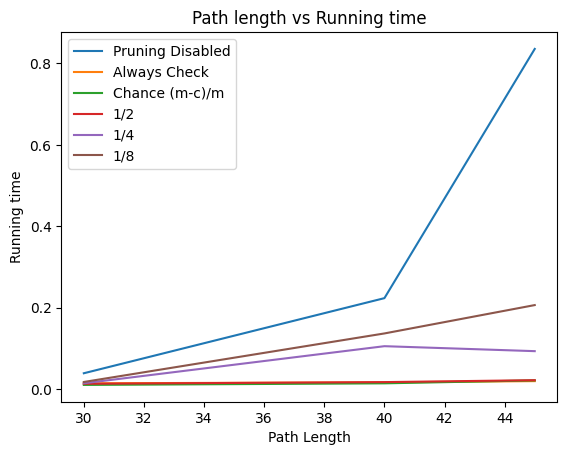

In [71]:
x = df_FS.iloc[:, 0]

for i in range(1, 7):
    if i == 1:
        plt.plot(x, df_FS.iloc[:, i], label=f'Pruning Disabled')
    elif i == 2:
        plt.plot(x, df_FS.iloc[:, i], label=f'Always Check')
    elif i == 3:
        plt.plot(x, df_FS.iloc[:, i], label=f'Chance (m-c)/m')
    elif i == 4:
        plt.plot(x, df_FS.iloc[:, i], label=f'1/2')
    elif i == 5:	
        plt.plot(x, df_FS.iloc[:, i], label=f'1/4')
    else:  
        plt.plot(x, df_FS.iloc[:, i], label=f'1/8')

plt.xlabel('Path Length')
plt.ylabel('Running time')
plt.title('Path length vs Running time')
plt.legend()
plt.show()

#### Run Time vs (No)Heuristic

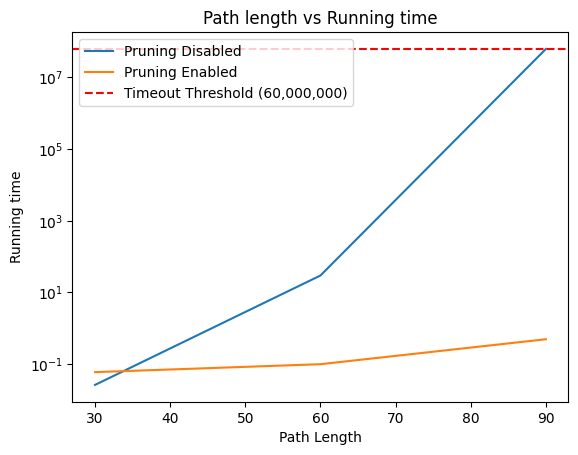

In [72]:
x = df_LT.iloc[:, 0]
timeout_threshold = 60000000

for i in range(1, 3):
    if i == 1:
        plt.plot(x, df_LT.iloc[:, i], label=f'Pruning Disabled')
    else:
        plt.plot(x, df_LT.iloc[:, i], label=f'Pruning Enabled')


plt.yscale('log')
plt.axhline(y=timeout_threshold, color='red', linestyle='--', label='Timeout Threshold (60,000,000)')
plt.xlabel('Path Length')
plt.ylabel('Running time')
plt.title('Path length vs Running time')
plt.legend()
plt.show()


#### Run Time vs Paths Generated

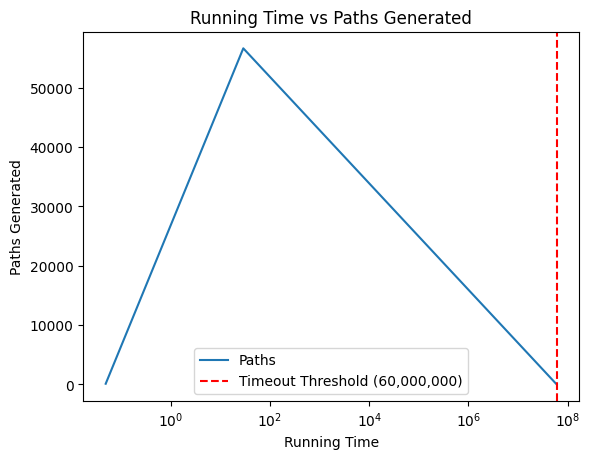

In [73]:
x = df_PT.iloc[:, 1]
timeout_threshold = 60000000

plt.plot(x, df_PT.iloc[:, 2], label=f'Paths')

plt.xscale('log')
plt.axvline(x=timeout_threshold, color='red', linestyle='--', label='Timeout Threshold (60,000,000)')
plt.xlabel('Running Time')
plt.ylabel('Paths Generated')
plt.title('Running Time vs Paths Generated')
plt.legend()
plt.show()


### MemberOf

#### Path Length vs Run Time (Pruning variations)

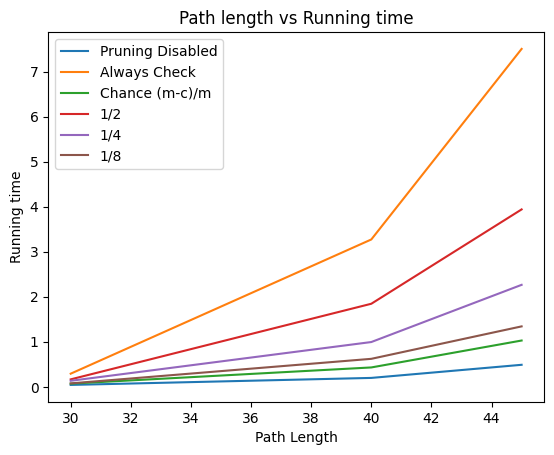

In [74]:
x = df_FS.iloc[:, 0]

for i in range(7, 13):
    if i == 7:
        plt.plot(x, df_FS.iloc[:, i], label=f'Pruning Disabled')
    elif i == 8:
        plt.plot(x, df_FS.iloc[:, i], label=f'Always Check')
    elif i == 9:
        plt.plot(x, df_FS.iloc[:, i], label=f'Chance (m-c)/m')
    elif i == 10:
        plt.plot(x, df_FS.iloc[:, i], label=f'1/2')
    elif i == 11:
        plt.plot(x, df_FS.iloc[:, i], label=f'1/4')
    else: 
        plt.plot(x, df_FS.iloc[:, i], label=f'1/8')

plt.xlabel('Path Length')
plt.ylabel('Running time')
plt.title('Path length vs Running time')
plt.legend()
plt.show()

#### Run Time vs (No)Heuristic

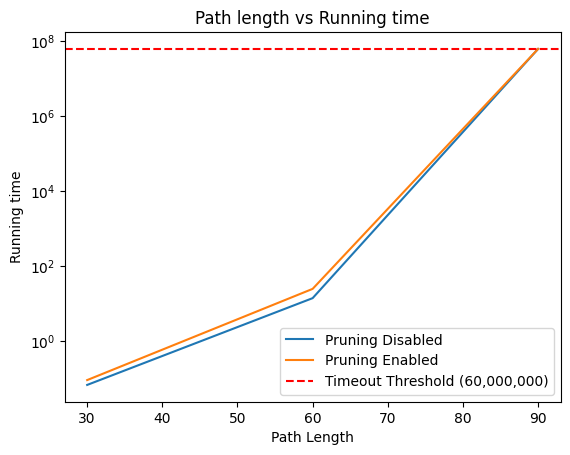

In [75]:
x = df_LT.iloc[:, 0]
timeout_threshold = 60000000

for i in range(3, 5):
    if i == 3:
        plt.plot(x, df_LT.iloc[:, i], label=f'Pruning Disabled')
    else:
        plt.plot(x, df_LT.iloc[:, i], label=f'Pruning Enabled')

plt.yscale('log')
plt.axhline(y=timeout_threshold, color='red', linestyle='--', label='Timeout Threshold (60,000,000)')
plt.xlabel('Path Length')
plt.ylabel('Running time')
plt.title('Path length vs Running time')
plt.legend()
plt.show()

#### Run Time vs Paths Generated

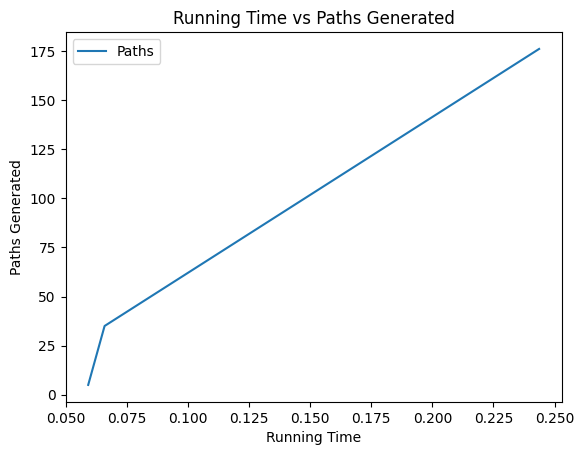

In [76]:
x = df_PT.iloc[:, 4]

plt.plot(x, df_PT.iloc[:, 5], label=f'Paths')

plt.xlabel('Running Time')
plt.ylabel('Paths Generated')
plt.title('Running Time vs Paths Generated')
plt.legend()
plt.show()


### PullUp

#### Path Length vs Run Time (Pruning variations)

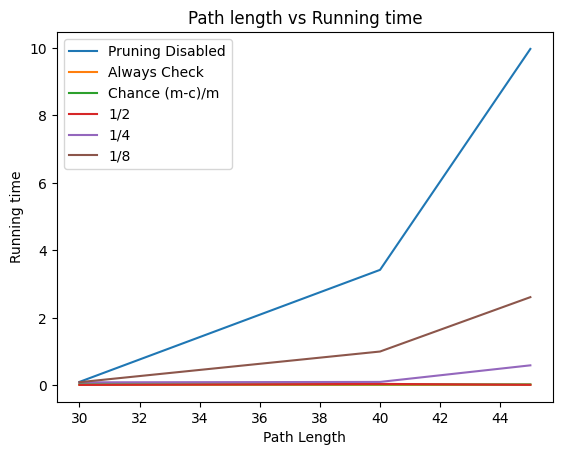

In [77]:
x = df_FS.iloc[:, 0]

for i in range(13, 19):
    if i == 13:
        plt.plot(x, df_FS.iloc[:, i], label=f'Pruning Disabled')
    elif i == 14:
        plt.plot(x, df_FS.iloc[:, i], label=f'Always Check')
    elif i == 15:
        plt.plot(x, df_FS.iloc[:, i], label=f'Chance (m-c)/m')
    elif i == 16:
        plt.plot(x, df_FS.iloc[:, i], label=f'1/2')
    elif i == 17:
        plt.plot(x, df_FS.iloc[:, i], label=f'1/4')
    else: 
        plt.plot(x, df_FS.iloc[:, i], label=f'1/8')

plt.xlabel('Path Length')
plt.ylabel('Running time')
plt.title('Path length vs Running time')
plt.legend()
plt.show()

#### Run Time vs (No)Heuristic

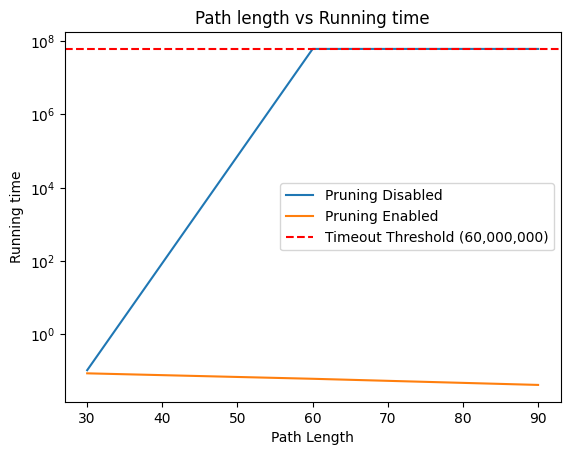

In [78]:
x = df_LT.iloc[:, 0]
timeout_threshold = 60000000

for i in range(5, 7):
    if i == 5:
        plt.plot(x, df_LT.iloc[:, i], label=f'Pruning Disabled')
    else:
        plt.plot(x, df_LT.iloc[:, i], label=f'Pruning Enabled')


plt.yscale('log')
plt.axhline(y=timeout_threshold, color='red', linestyle='--', label='Timeout Threshold (60,000,000)')
plt.xlabel('Path Length')
plt.ylabel('Running time')
plt.title('Path length vs Running time')
plt.legend()
plt.show()

#### Run Time vs Paths Generated

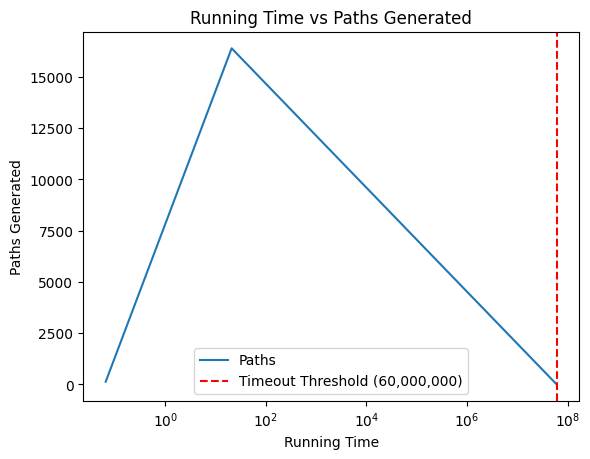

In [79]:
x = df_PT.iloc[:, 7]
timeout_threshold = 60000000

plt.plot(x, df_PT.iloc[:, 8], label=f'Paths')

plt.xscale('log')
plt.axvline(x=timeout_threshold, color='red', linestyle='--', label='Timeout Threshold (60,000,000)')
plt.xlabel('Running Time')
plt.ylabel('Paths Generated')
plt.title('Running Time vs Paths Generated')
plt.legend()
plt.show()

### Corellation Matrix

                 Running Time  Generated Paths  Pruned Paths
Running Time         1.000000        -0.229467     -0.312879
Generated Paths     -0.229467         1.000000     -0.153374
Pruned Paths        -0.312879        -0.153374      1.000000


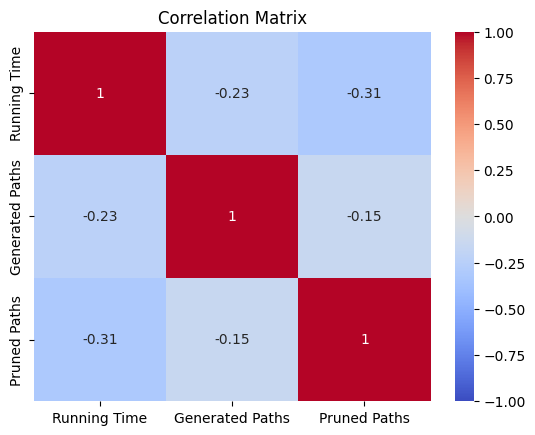

In [80]:
correlation_matrix = df_SELECTED.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()